In [2]:
import pandas as pd
from nilearn.plotting import plot_design_matrix
import os
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('/home/ubuntu/repos/learning-habits-analysis')
from utils.data import Subject

In [3]:
spm_base_dir = '/home/ubuntu/data/learning-habits/spm_format_20250603/outputs'
dm_path = 'glm1_combined_2025-09-15-01-56/sub-02/test/sub-02_test_design_matrix.csv'
colnames_path = 'glm1_combined_2025-09-15-01-56/sub-02/test/sub-02_test_column_names.txt'

In [10]:
# Read column names for both design matrices
with open(os.path.join(spm_base_dir, colnames_path), 'r') as f:
    colnames = [line.strip() for line in f.readlines()]

# Read design matrices using the column names
dm = pd.read_csv(os.path.join(spm_base_dir, dm_path), header=None, names=colnames)

In [11]:
def clean_spm_colname(col):
    # Remove 'Sn(1) ' prefix and '*bf(1)' or '*bf(1)'-like suffixes
    col = col.strip()
    if col.startswith('Sn(1) '):
        col = col[len('Sn(1) '):]
    if '*bf(1)' in col:
        col = col.replace('*bf(1)', '')
    return col.strip()

dm.columns = [clean_spm_colname(c) for c in dm.columns]

<Axes: label='conditions', ylabel='scan number'>

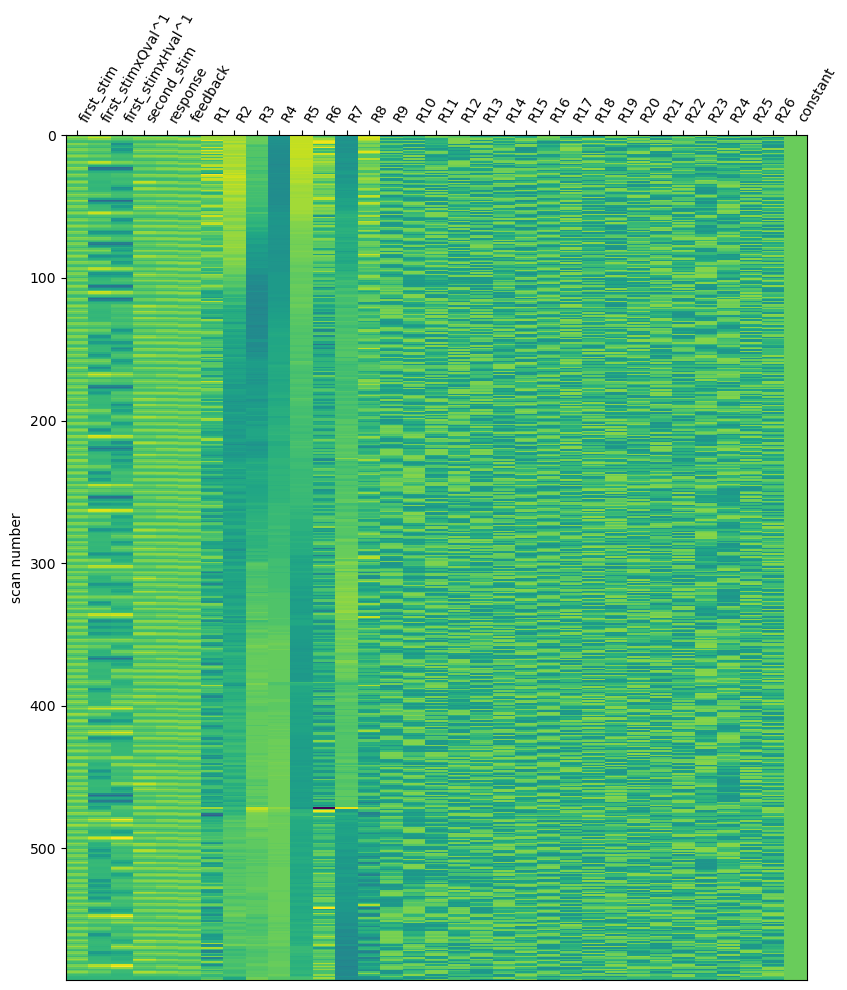

In [12]:
# Display the cleaned design matrix
plot_design_matrix(dm)

## Look at events

In [35]:
base_dir = '/home/ubuntu/data/learning-habits'
sub = Subject(base_dir, '02')

In [44]:
events = sub.test.events[:30]
events.head(10)

,onset,duration,trial_type,trial
0,0.009226,0.817357,first_stim_presentation,1
1,0.826583,0.364869,second_stim_presentation,1
2,1.191453,0.000000,response,1
3,1.210246,2.151995,purple_frame,1
4,3.362241,7.240122,iti,1
5,10.602363,0.934128,first_stim_presentation,2
6,11.536491,0.329929,second_stim_presentation,2
7,11.866420,0.000000,response,2
8,11.870114,2.185362,purple_frame,2
9,14.055476,6.222508,iti,2


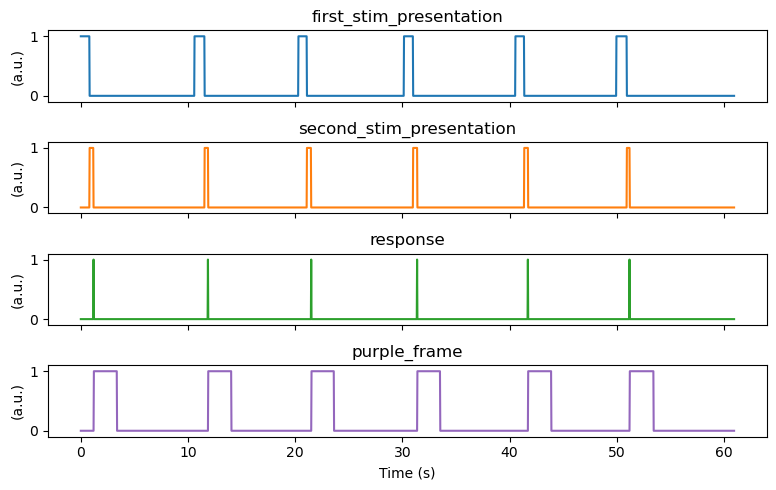

In [65]:
trial_types = events['trial_type'].unique()
n_types = len(trial_types) - 1  # Exclude 'iti'

# Define colors for each trial type (excluding 'iti')
color_map = {
    'first_stim_presentation': 'tab:blue',
    'second_stim_presentation': 'tab:orange',
    'response': 'tab:green',
    'purple_frame': 'tab:purple'
}

fig, axes = plt.subplots(n_types, 1, figsize=(8, 5), sharex=True)

plot_idx = 0
for ttype in trial_types:
    if ttype == 'iti':
        continue
    subset = events[events['trial_type'] == ttype]
    boxcar = np.zeros_like(t)
    for _, row in subset.iterrows():
        if ttype == 'response' and row['duration'] == 0:
            idx = np.argmin(np.abs(t - row['onset']))
            boxcar[idx] = 1
        else:
            mask = (t >= row['onset']) & (t < row['onset'] + row['duration'])
            boxcar[mask] = 1
    ax = axes[plot_idx] if n_types > 1 else axes
    ax.plot(t, boxcar, color=color_map.get(ttype, None))
    ax.set_title(ttype)
    ax.set_ylabel('(a.u.)')
    ax.set_ylim(-0.1, 1.1)
    plot_idx += 1

axes[-1].set_xlabel('Time (s)')
plt.tight_layout()
plt.show()


<Axes: label='conditions', ylabel='scan number'>

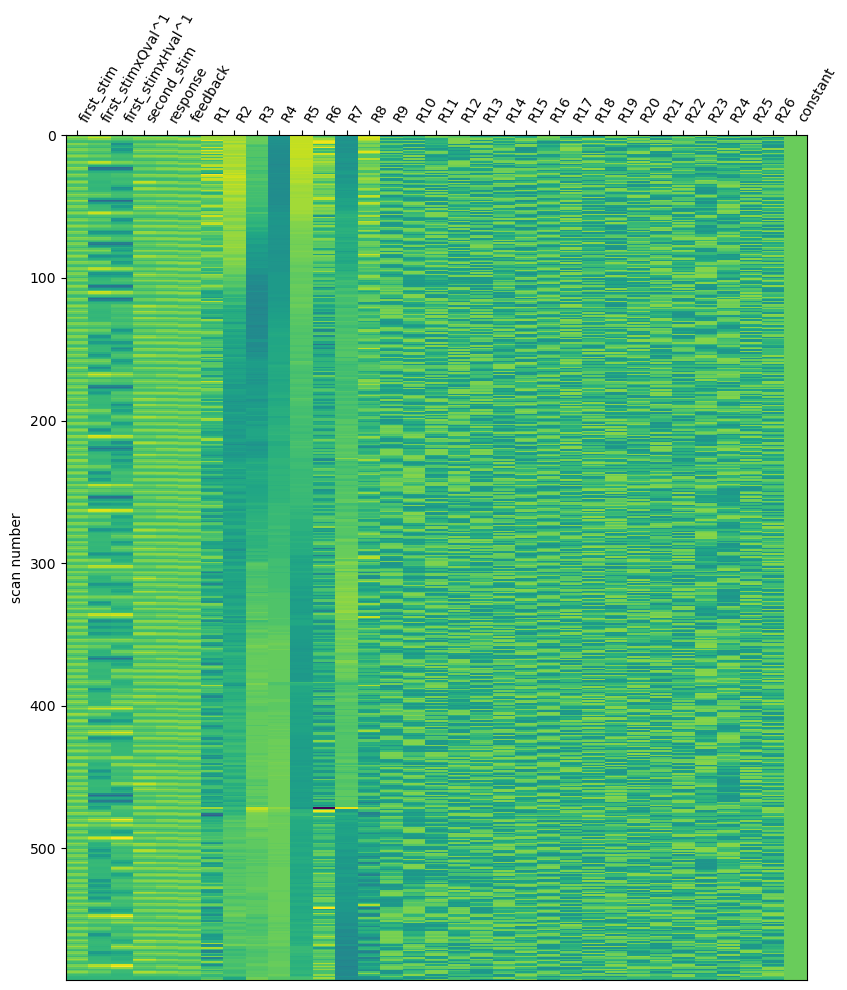

In [62]:
plot_design_matrix(glm1_dm)